In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import learning_curve

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from IPython.display import clear_output, display, HTML

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
all_data = pd.read_csv("all_data_preprocessed.csv")

all_data_X = all_data.loc[:, all_data.columns != 'totals_totalTransactionRevenue']
all_data_y = all_data['totals_totalTransactionRevenue']

In [4]:
all_models = {
    "Linear Regression": {
        'model': LinearRegression(fit_intercept=True, normalize=False)
    },
    "Polynomial Regression": {
        'model': LinearRegression(fit_intercept=True, normalize=False)
    },
    
    "Decision Tree": {
        'model': DecisionTreeRegressor(max_depth=6, min_samples_split=200, random_state = 0)
    },
    "Random Forest": {
        'model': RandomForestRegressor(max_depth=8,min_samples_split=400, n_estimators=10, random_state = 0)
    },
    
    "Perceptron": {
        'model': MLPRegressor(hidden_layer_sizes=(10,), learning_rate='constant', random_state = 0, shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False)
    },
    
    "Neural Network": "Waiting",
    
}

In [5]:
def compare_learning_curves(models, X, y):    
    plt.figure(figsize=(25,12))
    for name, values in models.items():
        
        if values != "Waiting":
            print("Working on", name, end=' ')
    
            if name == 'Polynomial Regression':
                poly = PolynomialFeatures(degree=2)
                train_sizes, train_scores, test_scores = learning_curve(values['model'], 
                                                                        poly.fit_transform(X), 
                                                                        y,
                                                                        cv = 5,
                                                                        scoring='neg_mean_squared_error')
                
            else:
                train_sizes, train_scores, test_scores = learning_curve(values['model'], 
                                                                        X, 
                                                                        y, 
                                                                        cv = 5,
                                                                        scoring='neg_mean_squared_error')

            # Create means and standard deviations of training set scores
            train_mean = np.absolute(np.mean(train_scores, axis=1))
            train_std = np.std(train_scores, axis=1)

            # Create means and standard deviations of test set scores
            test_mean = np.absolute(np.mean(test_scores, axis=1))
            test_std = np.std(test_scores, axis=1)

            # Draw line.
#             plt.subplot(1, 2, 1)
            plt.plot(train_sizes, train_mean, "--", label = name+" Learning Curve") #, color = rand_color_code ||||| +" Training Score"
            
#             plt.subplot(1, 2, 2)
            plt.plot(train_sizes, test_mean, label = name+" Cross Validation Curve")
            print("- Done", end="\n")
    clear_output()

#     plt.title("Learning Curve Comparison")
#     plt.gca().invert_yaxis()
    plt.xlabel("Size of Data Set")
    plt.ylabel("Score")

    plt.legend(loc="best")
    plt.show()

## Comparision of all models

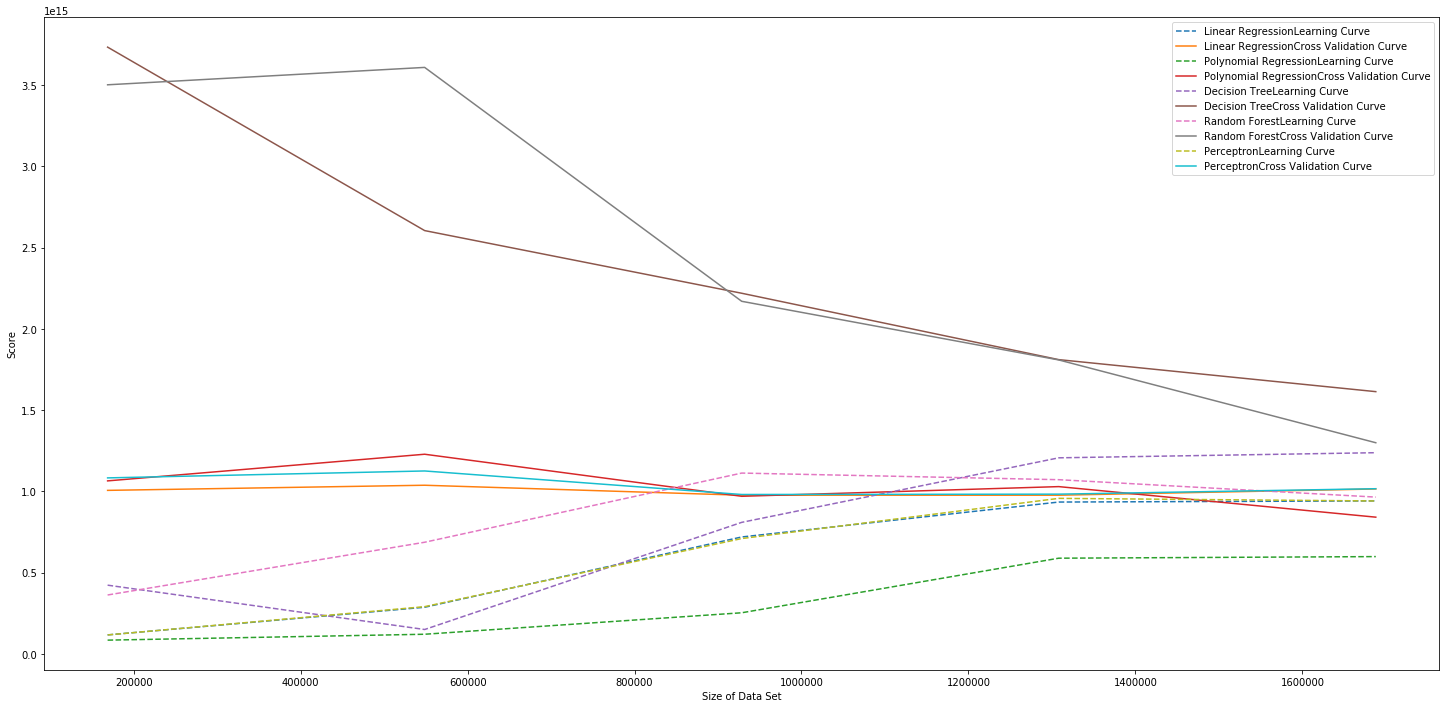

In [6]:
compare_learning_curves(all_models, all_data_X, all_data_y)